In [1]:
%matplotlib inline
import matplotlib as plt
plt.style.use('ggplot')
import pandas as pd
import re
from time import mktime, strptime
from datetime import datetime, timedelta
import plotly.plotly as py
import plotly.graph_objs as go
import cufflinks as cf
cf.set_config_file(offline=False, world_readable=True, theme='ggplot')

In [2]:
from IPython.core.display import HTML
css = open("styles/style-table.css").read() + open('styles/style-notebook.css').read() + open("styles/test.css").read()
HTML('<style>{}</style>'.format(css))

In [3]:
regex = re.compile(r'((?P<hours>\d+?)hr)\s?((?P<minutes>\d+?)min)?((?P<seconds>\d+?)s)?')
def parse_time(time_str):
    parts = regex.match(time_str)
    if not parts:
        return
    parts = parts.groupdict()
    time_params = {}
    for (name, param) in list(parts.items()):
        if param:
            time_params[name] = int(param)
    return timedelta(**time_params)

In [65]:
def parse_csv(filepath) -> pd.DataFrame:
    df = pd.DataFrame.from_csv(filepath, index_col=[1])
    df = df[df['Unnamed: 16'].notnull()]
    df = df[1:]
    df.columns = ['part', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'time']
    df = df[['part', 'time']]
    df = df.reset_index()
    df = df[df['index'].notnull()]
    df = df.fillna(method='pad')
    equalities = df[df.part.str.contains('Part') & df.time.str.contains('Part')]
    equalities = equalities.index.values
    total_times = []
    for equality in equalities:
        total_times.append(df.loc[equality+1])
    df = pd.DataFrame(total_times)
    df = df.reset_index()
    df['datetime'] = [parse_time(t) for t in df.time]
    df['minutes'] = df.datetime.astype('timedelta64[m]')
    return df[['part', 'minutes']]

In [66]:
dfs = []
files = [
    "~/Downloads/Sophie's Universe Colours per Round LARGE - Mine.csv",
    "~/Downloads/Sophie's Universe Colours per Round LARGE - Emily.csv",
    "~/Downloads/Sophie's Universe Colours per Round LARGE - Sherry.csv",
    "~/Downloads/Sophie's Universe Colours per Round LARGE - Lori.csv",
]
for file in files:
    dfs.append(parse_csv(file))

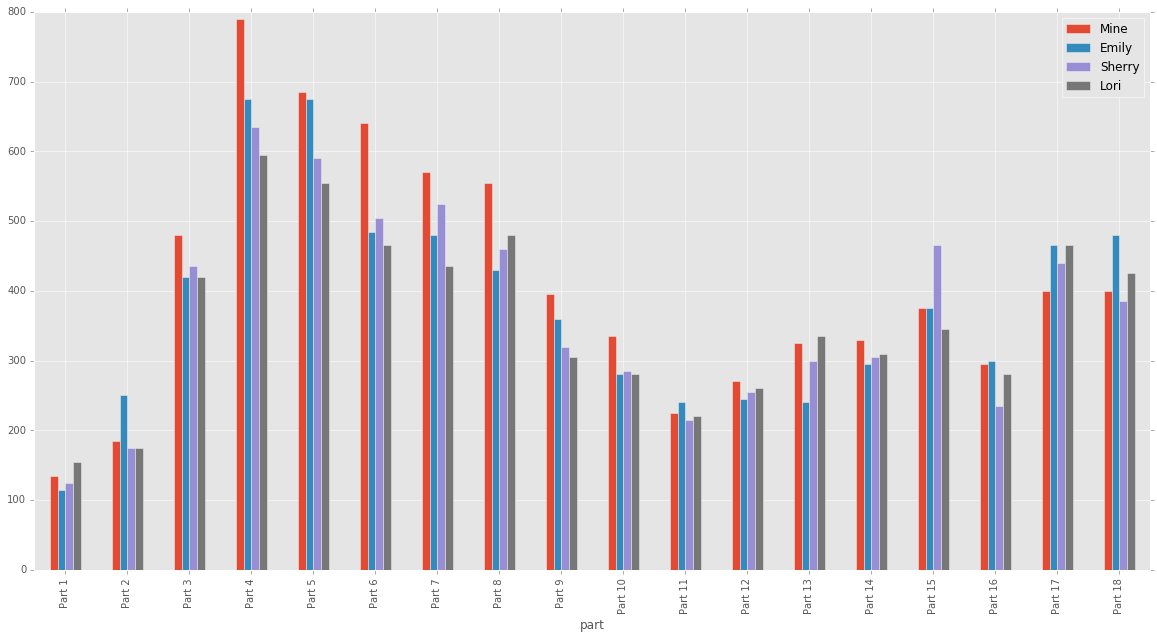

In [82]:
combined = pd.merge(dfs[0], dfs[1], on='part')
combined = pd.merge(combined, dfs[2], on='part')
combined = pd.merge(combined, dfs[3], on='part')
combined.columns = ['part', 'Mine', 'Emily', 'Sherry', 'Lori']
combined.plot(x='part', kind='bar', figsize=(20,10))